# Implements LQR

just calls calc_lqr_input to get a control, then executes the control and call calc_lqr_input again on the new state/action, where the action is initialized as the action done before.

In [25]:
from deeprl_hw3.arm_env import TwoLinkArmEnv
import numpy as np
import time
import gym

In [26]:
#params
ENV = 'TwoLinkArm-v0'
env = gym.make(ENV)
sim_env = gym.make(ENV)

[2017-04-22 23:31:39,090] Making new env: TwoLinkArm-v0
[2017-04-22 23:31:39,093] Making new env: TwoLinkArm-v0


In [27]:
x = env.reset()
sim_env.reset()

array([ 0.,  0.,  0.,  0.])

In [28]:
from deeprl_hw3.controllers import approximate_A, approximate_B
from scipy.linalg import solve_continuous_are as sol_riccatti
# if u is None:
u = np.zeros(env.DOF)

x = np.hstack((env.q, env.dq))
A = approximate_A(sim_env,x,u)
B = approximate_B(sim_env,x,u)
R = env.R
Q = env.Q
P = sol_riccatti(A, B, Q, R)
K = np.linalg.inv(R).dot(((B.T).dot(P)))
u = -K.dot(x-env.goal)
print(u)


[ 2560.  3000.]


In [13]:
A = np.ones((2,2))
B = np.array([[1],[0]])
A.dot(B)

array([[ 1.],
       [ 1.]])

In [6]:
from deeprl_hw3.arm_env import TwoLinkArmEnv
import numpy as np
import time
import gym
from deeprl_hw3.controllers import calc_lqr_input
import matplotlib.pyplot as plt

#params
ENV = 'TwoLinkArm-v1'


env = gym.make(ENV)
sim_env = gym.make(ENV)

state = env.reset()
sim_env.reset()

done = False
i = 0
u = np.zeros(env.DOF)
while not done:
    u = np.zeros(env.DOF)
    u = calc_lqr_input(env,sim_env,u)
    _,_,done,_= env.step(u)
    i+=1
    if i % 1000 == 0:
        env.render()
        print('u',u)
        print('state',env.state)
        print(done)
    if done:
        print(i)
        print(env.state)
        print('done!')

[2017-04-22 23:40:57,543] Making new env: TwoLinkArm-v1
[2017-04-22 23:40:57,546] Making new env: TwoLinkArm-v1


462
[ 2.55508088  2.99875348 -0.00806361  0.00966479]
done!


[2017-04-23 00:03:34,728] Making new env: TwoLinkArm-v0
[2017-04-23 00:03:34,731] Making new env: TwoLinkArm-v0


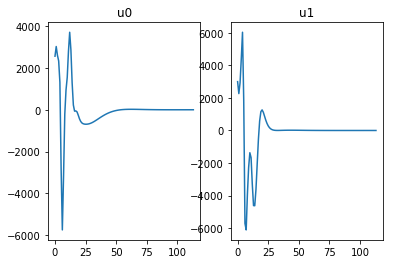

In [12]:
''' implements lqr

'''
from deeprl_hw3.arm_env import TwoLinkArmEnv
import numpy as np
import time
import gym
from deeprl_hw3.controllers import calc_lqr_input
import matplotlib.pyplot as plt

#params
ENV = 'TwoLinkArm-v0'


env = gym.make(ENV)
sim_env = gym.make(ENV)

state = env.reset()
sim_env.reset()

done = False
i = 0
u0_list = []
u1_list = []
q1_list = []
q0_list = []
q1dot_list = []
q0dot_list = []
while not done:
    u = calc_lqr_input(env,sim_env)
    state,_,done,_ = env.step(u)
    i+=1
    u0_list.append(u[0])
    u1_list.append(u[1])
    q0_list.append(state[0])
    q1_list.append(state[1])
    q0dot_list.append(state[2])
    q1dot_list.append(state[3])

plt.figure(1)
plt.subplot(121)
plt.plot(u0_list)
plt.title('u0')

plt.subplot(122)
plt.plot(u1_list)
plt.title('u1')

plt.
plt.show()

#### till here we creared the environments, now we need to approximate A and B to calculate the opmtimal action

##### to do so

1. we perturb the states, one dimmension at a time
2. with the perturbed state we run the dynamics for a small time
3. the results of the simulation in each perturbed state should be averaged and divided by 2 pertb